In [1]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
%%time
import pandas as pd
import re
import string
#!pip install nltk
#!pip install spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

CPU times: user 1.83 ms, sys: 1.34 ms, total: 3.17 ms
Wall time: 1.79 ms


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
%%time

import re
import nltk
#!pip install pandarallel
from pandarallel import pandarallel

# Assuming you have already installed the pandarallel library

# Initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 19.1 ms, sys: 0 ns, total: 19.1 ms
Wall time: 18.3 ms


### NER

In [4]:
import pickle

# Open the pickle file in binary mode
with open('negative_sent_articles.pkl', 'rb') as file:
    # Load the object from the pickle file
    df_n = pickle.load(file)

df = df_n

In [5]:
df = df.sample(5000,random_state=42)

In [6]:
#!pip install spacy

In [7]:
#!python -m spacy download en_core_web_sm

In [8]:
%%time

import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

entities = []
labels = []
position_start = []
position_end = []

# Iterate over each text in the 'clean_text' column
for text in df['clean_text']:
    # Apply spaCy NLP pipeline to extract entities
    doc = nlp(text)
    
    # Extract entity details and append to respective lists
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        position_start.append(ent.start_char)
        position_end.append(ent.end_char)
        
# Create a new DataFrame from the extracted entity details
entity_df = pd.DataFrame({'Entities': entities, 'Labels': labels, 'Position_Start': position_start, 'Position_End': position_end})

2023-05-25 22:47:17.607740: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 22:47:18.620061: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


CPU times: user 10min 46s, sys: 4.85 s, total: 10min 50s
Wall time: 10min 51s


In [9]:
!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_md

2023-05-25 22:58:09.659111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [10]:
# Print the first 20 rows of the entity DataFrame
entity_df.head(20)

,Entities,Labels,Position_Start,Position_End
0,SkyRunner,ORG,0,9
1,INVISIO,ORG,18,25
2,Intercom,GPE,26,34
3,AI,ORG,39,41
4,Gen II,PERSON,51,57
5,the SkyRunner MK,ORG,84,100
6,ExpoDakota,ORG,153,163
7,UsMeet,ORG,244,250
8,WatchJob News,ORG,277,290
9,VideoSchedule,ORG,291,304


In [22]:
# Extract top organizations
top_organizations = entity_df[entity_df['Labels'] == 'ORG']['Entities'].value_counts().head(1000)

# Extract top locations
top_locations = entity_df[entity_df['Labels'] == 'GPE']['Entities'].value_counts().head(1000)

In [25]:
# Print the top organizations
print("Top Organizations:")
top_organizations.head(10)

Top Organizations:


AI                         26303
Google                      3768
Microsoft                   2914
Gray Media Group            1660
Artificial Intelligence      835
ML                           779
Amazon                       739
AP                           646
PRNewswire                   626
Bard                         617
Name: Entities, dtype: int64

In [26]:
# Print the top locations
print("Top Locations:")
print(top_locations)

Top Locations:
OpenAI           2613
U.S.             1560
US               1361
China            1209
India             939
                 ... 
Jasper County       3
Magicicada          3
Grammarly           3
Johannes            3
Protect AI          3
Name: Entities, Length: 1000, dtype: int64


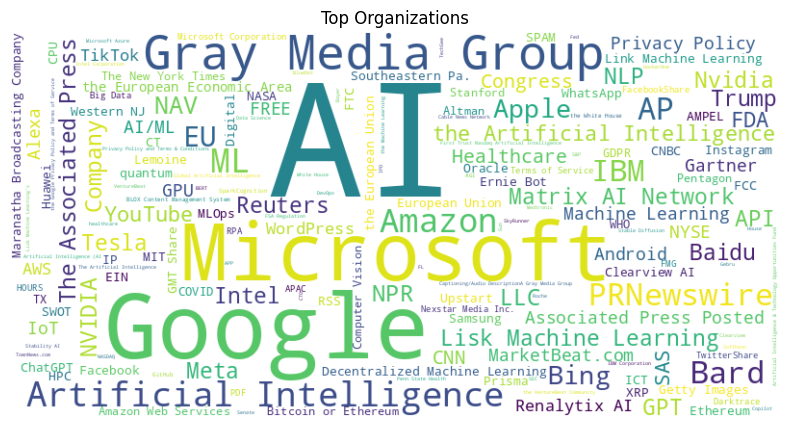

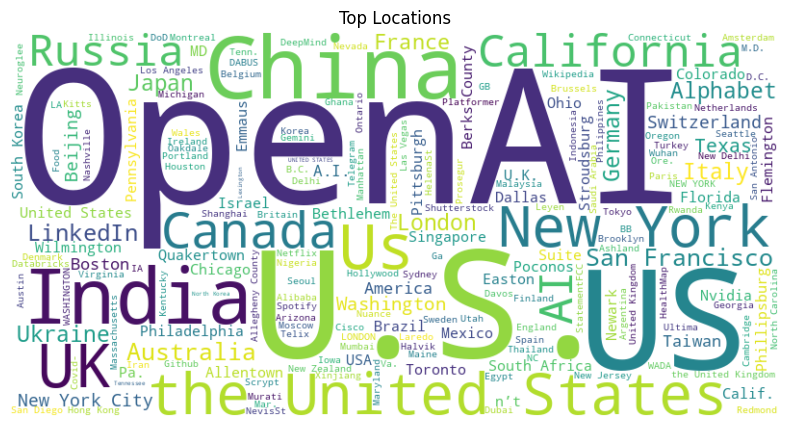

In [27]:
#!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Top organizations
organizations_data = top_organizations.index.tolist()
organizations_counts = top_organizations.values.tolist()

organizations_wordcloud_data = dict(zip(organizations_data, organizations_counts))

organizations_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(organizations_wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(organizations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Organizations')
plt.show()

# Top locations
locations_data = top_locations.index.tolist()
locations_counts = top_locations.values.tolist()

locations_wordcloud_data = dict(zip(locations_data, locations_counts))

locations_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(locations_wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(locations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Locations')
plt.show()

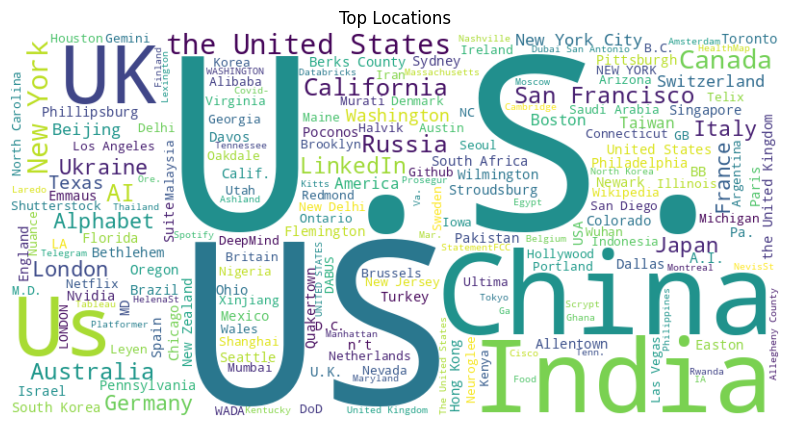

In [28]:
import re
from wordcloud import STOPWORDS

# Top locations
locations_data = top_locations.index.tolist()
locations_counts = top_locations.values.tolist()

# Remove 'OpenAI' from locations_data
locations_data = [re.sub(r'\bOpenAI\b', '', location, flags=re.IGNORECASE) for location in locations_data]

# Create wordcloud data dictionary
locations_wordcloud_data = dict(zip(locations_data, locations_counts))

# Generate wordcloud
locations_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(locations_wordcloud_data)

# Plot wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(locations_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Locations')
plt.show()
